The Santander customer transaction dataset is a bit of a different dataset since it does not have any meaningful features or features that could hep us intuitively understand what they really mean and how would they impact our model and its perfomance on the target. 

The train set contains 200 features from var0 to var199, with samples that are only of float data type i.e only decimal numbers. Therefore, it becomes difficult to make intuitive sense of the data. Although there is still some scope for Exploratory Analysis hoping that would help us get some clarity on where we are headed.

The data we have is huge for pandas to handle and so before performing Exploratory Analysis we would be reducing the memory usage of the data by replacing signed integers by unsigned wherever necesarry. Then, proceeding  with the Model building and Implementation.

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Reading the training and testing sets

In [2]:
train = pd.read_csv('D:/Santander Customer Transaction Prediction/train.csv')
test = pd.read_csv('D:/Santander Customer Transaction Prediction/test.csv')

Viewing the dataset

In [3]:
pd.set_option('display.max_columns', None)
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [4]:
train.shape

(200000, 202)

In [5]:
test.shape

(200000, 201)

Checking for any null values in the test and the train sets

In [6]:
row = test.isnull().any(axis = 1)
column = test.isnull().any(axis = 0)
test.loc[row, column]

""


In [7]:
row = train.isnull().any(axis = 1)
column = train.isnull().any(axis = 0)
train.loc[row, column]

""


Getting information about the dataframe using .info() method

In [8]:
train.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 319.8 MB


In [9]:
test.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 318.0 MB


As we can see from the above results that our dataset is quite larger in size and has 200000 rows and 200 columns each for the train and the test set. Thus, we will have to reduce the size of the dataset. 

# Memory Usage and Reduction

Average memory usage by data types

In [10]:
for dtype in ['float', 'integer', 'object']:
    selected_dtype = train.select_dtypes(include = [dtype])
    mean_usage_bytes = selected_dtype. memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_bytes/1024 ** 2
    print('Average memory usage for {} columns: {:03.2f} MB'.format(dtype, mean_usage_mb))

Average memory usage for float columns: 1.52 MB
Average memory usage for integer columns: 0.76 MB
Average memory usage for object columns: 6.53 MB


In [11]:
for dtype in ['float', 'integer', 'object']:
    selected_dtype = test.select_dtypes(include = [dtype])
    mean_usage_bytes = selected_dtype. memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_bytes/1024 ** 2
    print('Average memory usage for {} columns: {:03.2f} MB'.format(dtype, mean_usage_mb))

Average memory usage for float columns: 1.52 MB
Average memory usage for integer columns: 0.00 MB
Average memory usage for object columns: 6.43 MB


We can explore subtypes of numeric data like unsigned and signed integers and can use unsigned integers that could help us in reducing memory usage.

In [12]:
int_types = ['uint8','int8','int16']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [13]:
#defining a function for memory usage so that it can be used no. of times later on
def memory_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep = True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep = True)
    usage_mb = usage_b / 1024 ** 2
    return "{:03.2f} MB".format(usage_mb)

train_float = train.select_dtypes(include = ['float'])
converted_float = train_float.apply(pd.to_numeric, downcast = 'float')
print(memory_usage(train_float))
print(memory_usage(converted_float))
compare_floats = pd.concat([train_float.dtypes,converted_float.dtypes], axis = 1)
compare_floats.columns = ['before', 'after']
compare_floats.apply(pd.Series.value_counts)

305.18 MB
152.59 MB


,before,after
float32,NaN,200.0
float64,200.0,NaN


In [14]:
test_float = test.select_dtypes(include = ['float'])
converted_float = test_float.apply(pd.to_numeric, downcast = 'float')
print(memory_usage(test_float))
print(memory_usage(converted_float))
compare_floats = pd.concat([test_float.dtypes,converted_float.dtypes], axis = 1)
compare_floats.columns = ['before', 'after']
compare_floats.apply(pd.Series.value_counts)

305.18 MB
152.59 MB


,before,after
float32,NaN,200.0
float64,200.0,NaN


In [15]:
reduced_train = train.copy()
reduced_train[converted_float.columns] = converted_float
print(memory_usage(reduced_train))

167.17 MB


In [16]:
reduced_test = test.copy()
reduced_test[converted_float.columns] = converted_float
print(memory_usage(reduced_test))

165.45 MB


As we can see that we have dramatically decreased the memory usage of our data (by about 50%)

# Building some basic Visualizations

Let's build some basic visualizations using some features randomly along with the target and also check the  nature of the target and how it varies with some of the sample features.

Visualising target Counts by category (0 and 1)

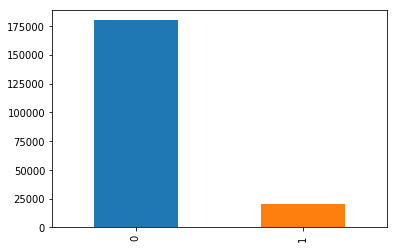

In [17]:
%matplotlib inline
train['target'].value_counts().plot.bar()

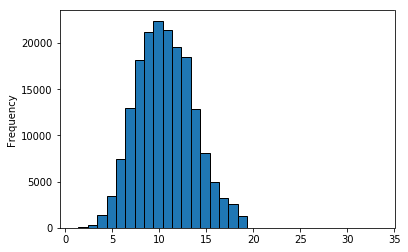

In [18]:
x0 = list(range(0,40,5))
train[train['target']==0].var_0.plot(kind = 'hist', bins=20, xticks = x0, edgecolor = 'black')
plt.show()

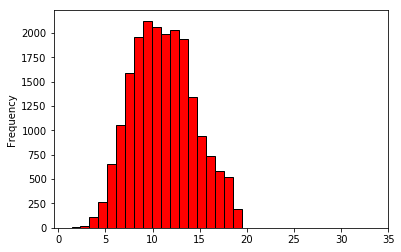

In [ ]:
x1 = list(range(0,40,5))
train[train['target']==1].var_0.plot(kind = 'hist', bins = 20, color='red', xticks = x1, edgecolor = 'black')
plt.show()

Let's randomly pick a few features and plot them in form of a histogram to visualize how are their values distributed

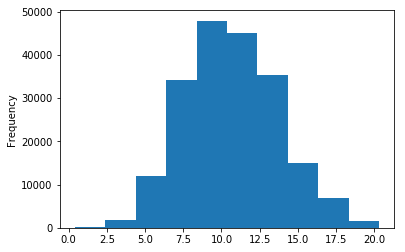

In [ ]:
train['var_0'].plot(kind = 'hist')

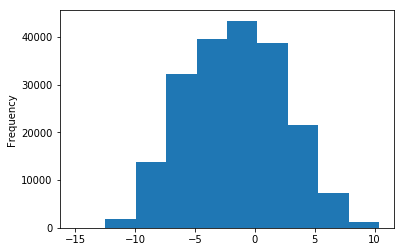

In [ ]:
train['var_1'].plot(kind = 'hist')

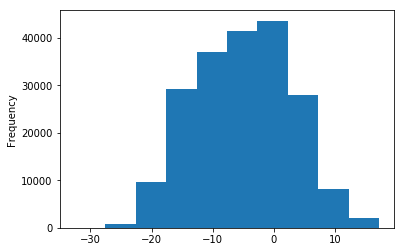

In [ ]:
train['var_5'].plot(kind = 'hist')

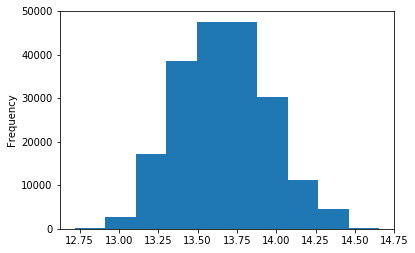

In [ ]:
train['var_25'].plot(kind = 'hist')

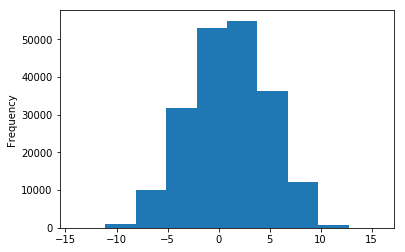

In [ ]:
train['var_65'].plot(kind = 'hist')

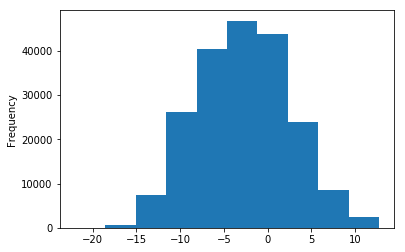

In [ ]:
train['var_180'].plot(kind = 'hist')

All of these features seem to be distributed in a quite similar pattern

# Model Building and Classification of Test Targets

Readying the dataset for model building

In [ ]:
train_Id = train['ID_code']
y = train['target']
train.drop(['ID_code', 'target'], axis = 1, inplace = True)

In [ ]:
test_Id = test['ID_code']
test.drop(columns = 'ID_code', inplace = True)

We will be using three classification models: Random Forest Classifier, K-Nearest Neighbors, Support Vector Machine 

# Random Forest Classifier 

In [ ]:
rfc = RandomForestClassifier()

#Setting the parameters for ensemble RFC 
param_grid = {'max_depth': [5, 6], 'max_features': [7,8,9],  
              'min_samples_split': [6, 7, 8]}

#Using GridSearchCV for optimized selection of parameters
rf = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)

#Fitting the model on the training data
rf.fit(train,y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)

C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: Future

C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: Future

C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: Future

C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: Future

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 39.8min finished
C:\Users\admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 6], 'max_features': [7, 8, 9], 'min_samples_split': [6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [ ]:
#Applying the fitted model on the test set for classification using the predict method
RFC_pred = rf.predict(test)

#Storing results in RFC_pred
RFC_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Support Vector Machines Classifier

In [ ]:
#Setting the parameters for SVC 
param_grid = {'C': [0.1,10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']}

#Using GridSearchCV for optimized selection  of parameters
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)

#Fitting the model on the training data
svc_grid.fit(train,y)

In [ ]:
#Applying the fitted model on the test set for classification using the predict method
SVC_pred = svc_grid.predict(test)

# K-Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()

#Setting the parameters for SVC 
param_grid = dict(n_neighbors=[5,6], weights=['distance'])

#Using GridSearchCV for optimized selection  of parameters
knn_grid = GridSearchCV(knn, param_grid, cv=10, verbose=1, scoring='accuracy')

#Fitting the model on the training data
knn_grid.fit(train, y)

In [ ]:
#Applying the fitted model on the test set for classification using the predict method
KNN_pred = knn_grid.predict(test)